<a href="https://colab.research.google.com/github/Pavi99sandamini151/Machine_learning/blob/main/Random_forest_19001517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pds
data = pds.read_csv('/content/drive/MyDrive/ML_Assignemt_19001517/nursery.csv')
data.head()

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Rank
0,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
1,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
3,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,inconv,slightly_prob,not_recom,not_recom


In [8]:
mapParents={"usual":1,"pretentious":2,"great_pret":3}
data['Parents']=data['Parents'].map(mapParents)
mapHas_nurs={"proper":1,"less_proper":2,"improper":3,"critical":4,"very_crit":5}
data['Has_nurs']=data['Has_nurs'].map(mapHas_nurs)
mapForm={"complete":1,"completed":1,"incomplete":2,"foster":3}
data['Form']=data['Form'].map(mapForm)
mapChildren={"1":1,"2":2,"3":3,"more":4}
data['Children']=data['Children'].map(mapChildren)
mapHousing={"convenient":1,"less_conv":2,"critical":3}
data['Housing']=data['Housing'].map(mapHousing)
mapFinance={"convenient":1,"inconv":2}
data['Finance']=data['Finance'].map(mapFinance)
mapSocial={"nonprob":1,"slightly_prob":2,"problematic":3}
data['Social']=data['Social'].map(mapSocial)
mapHealth={"recommended":1,"priority":2,"not_recom":3}
data['Health']=data['Health'].map(mapHealth)
mapRank={"very_recom":1,"spec_prior":2,"recommend":3,"priority":4,"not_recom":5}
data['Rank']=data['Rank'].map(mapRank)

In [9]:
data.head()

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Rank
0,1,1,1,1,1,1,1,3,5
1,1,1,1,1,1,1,2,3,5
2,1,1,1,1,1,1,3,3,5
3,1,1,1,1,1,2,1,3,5
4,1,1,1,1,1,2,2,3,5


In [10]:
x=data.iloc[:, :8]
y=data.iloc[:,8]

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=4,bootstrap=True,ccp_alpha=0.00)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [13]:
from sklearn import metrics

print("Accuracy of the model is:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model is: 0.966820987654321


In [17]:
featureImportance = pds.Series(clf.feature_importances_,index=['Parents','Has_nurs','Form','Children','Housing','Finance','Social','Health']).sort_values(ascending=False)
featureImportance

Health      0.601636
Has_nurs    0.135984
Parents     0.087718
Children    0.048559
Social      0.041619
Housing     0.037531
Form        0.029059
Finance     0.017893
dtype: float64

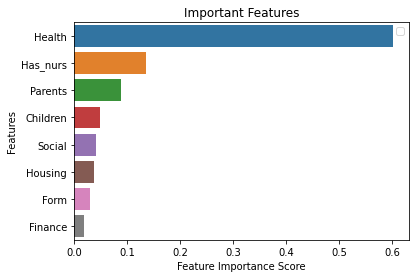

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.color_palette("Paired")
sns.barplot(x=featureImportance, y=featureImportance.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()